In [41]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/produits_final.csv")
print(df.head()) #first lines of the dataframe
print(df.info())# type of the column
print(df.describe())#stat for the price of the products

                                                 url  \
0  https://www.miumiu.com/fr/fr/p/cardigan-en-cac...   
1  https://www.miumiu.com/fr/fr/p/polo-en-pique-e...   
2  https://www.miumiu.com/fr/fr/p/pantalon-en-bat...   
3  https://www.miumiu.com/fr/fr/p/mocassins-ruche...   
4  https://www.miumiu.com/fr/fr/p/veste-a-capuche...   

                                               titre  \
0  Cardigan En Cachemire Et Soie À Maille Torsadé...   
1           Polo En Piqué Et Popeline Bleu | Miu Miu   
2                 Pantalon En Batavia Bleu | Miu Miu   
3     Mocassins Ruches En Cuir Nappa Blanc | Miu Miu   
4  Veste À Capuche Zippée En Cachemire Tabac | Mi...   

                                         description  prix_numeric  \
0  Ce cardigan en cachemire et soie affiche un mo...        2000.0   
1  Le polo classique en piqué est revisité selon ...         890.0   
2  L’essence classique du tissu batavia prend un ...        1250.0   
3  Ces élégants mocassins en cuir nappa affich

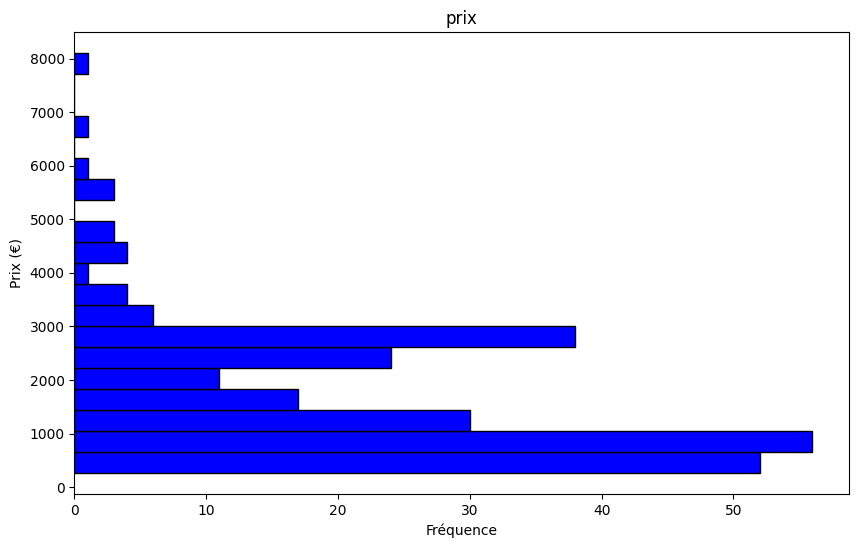

In [ ]:
#histo for price
plt.figure(figsize=(10, 6))
df['prix_numeric'].plot(kind='hist', bins=20, edgecolor='black', color='blue', orientation='horizontal')
plt.title('prix')
plt.xlabel('Fréquence')
plt.ylabel('Prix (€)')
plt.show()


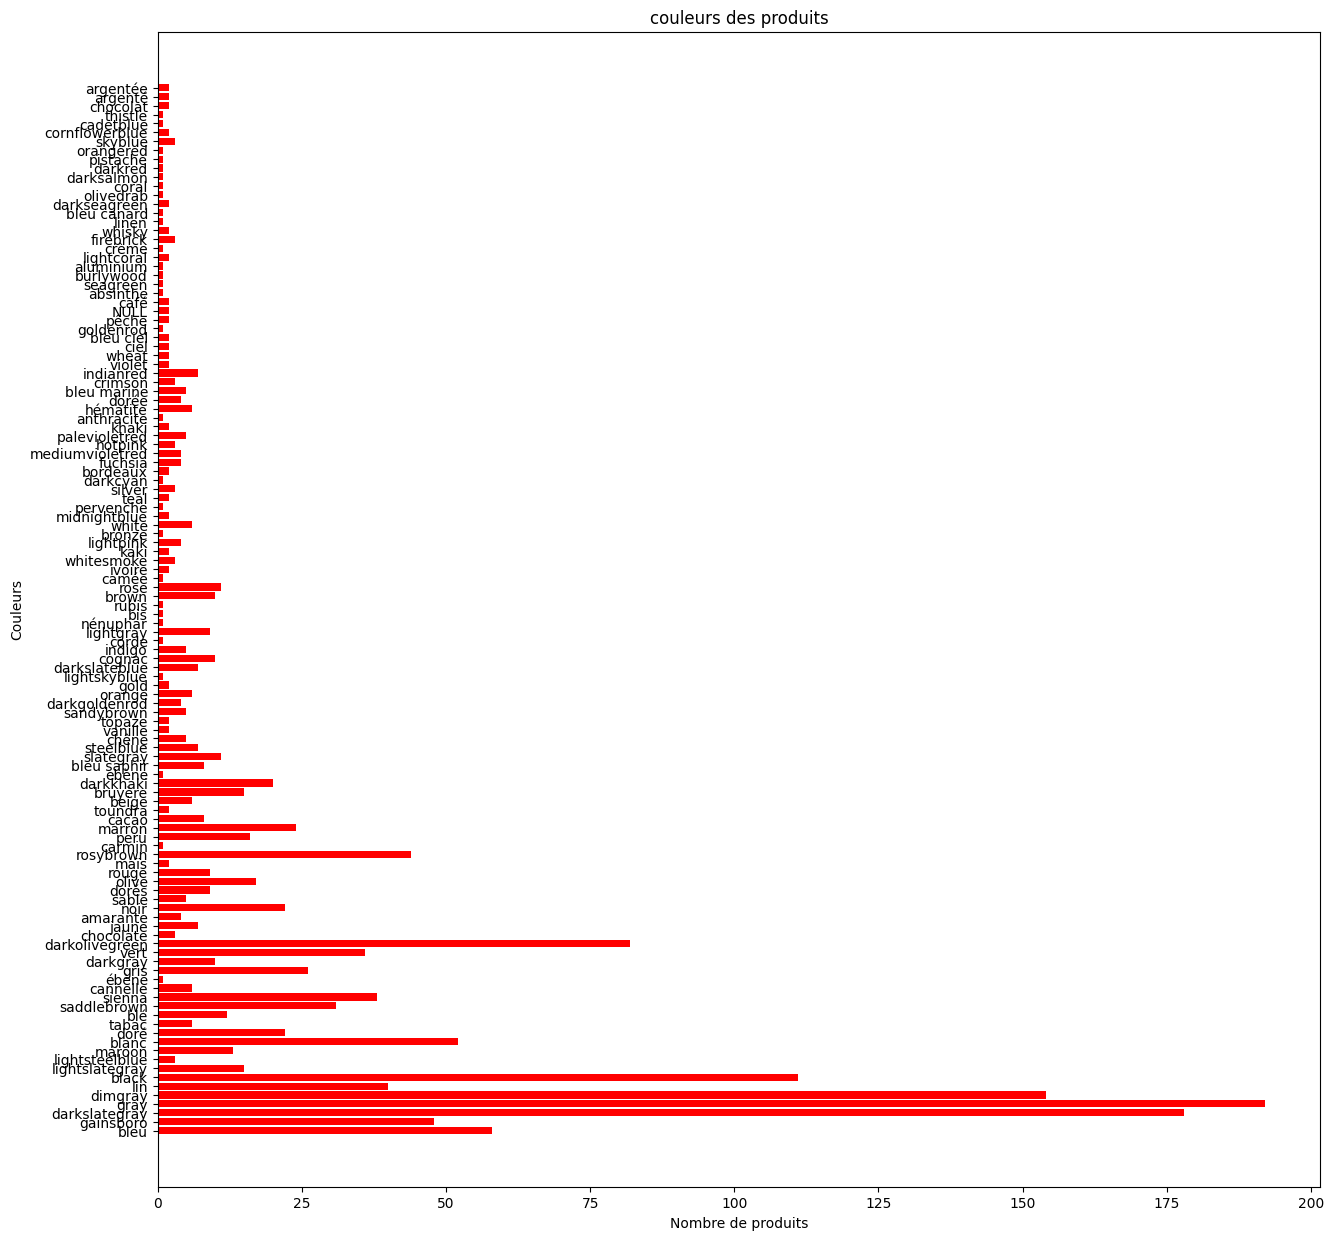

In [ ]:
from collections import Counter

couleurs_flat = [couleur for couleurs in df['color_names'] for couleur in eval(couleurs)]
couleurs_count = Counter(couleurs_flat)

#Color
plt.figure(figsize=(15, 15))
plt.barh(list(couleurs_count.keys()), list(couleurs_count.values()), color='red')
plt.title('couleurs des produits')
plt.ylabel('Couleurs')
plt.xlabel('Nombre de produits')
plt.show()

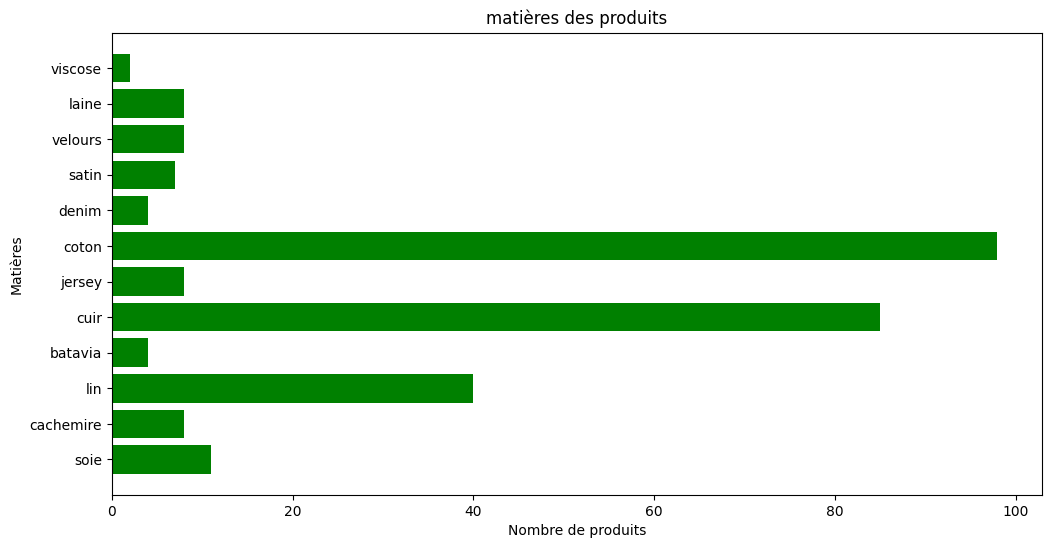

In [ ]:
# matière
matières_flat = [matière for matières in df['matières'] for matière in eval(matières)]
matières_count = Counter(matières_flat)


plt.figure(figsize=(12, 6))
plt.barh(list(matières_count.keys()), list(matières_count.values()), color='green')
plt.title('matières des produits')
plt.ylabel('Matières')
plt.xlabel('Nombre de produits')
plt.show()


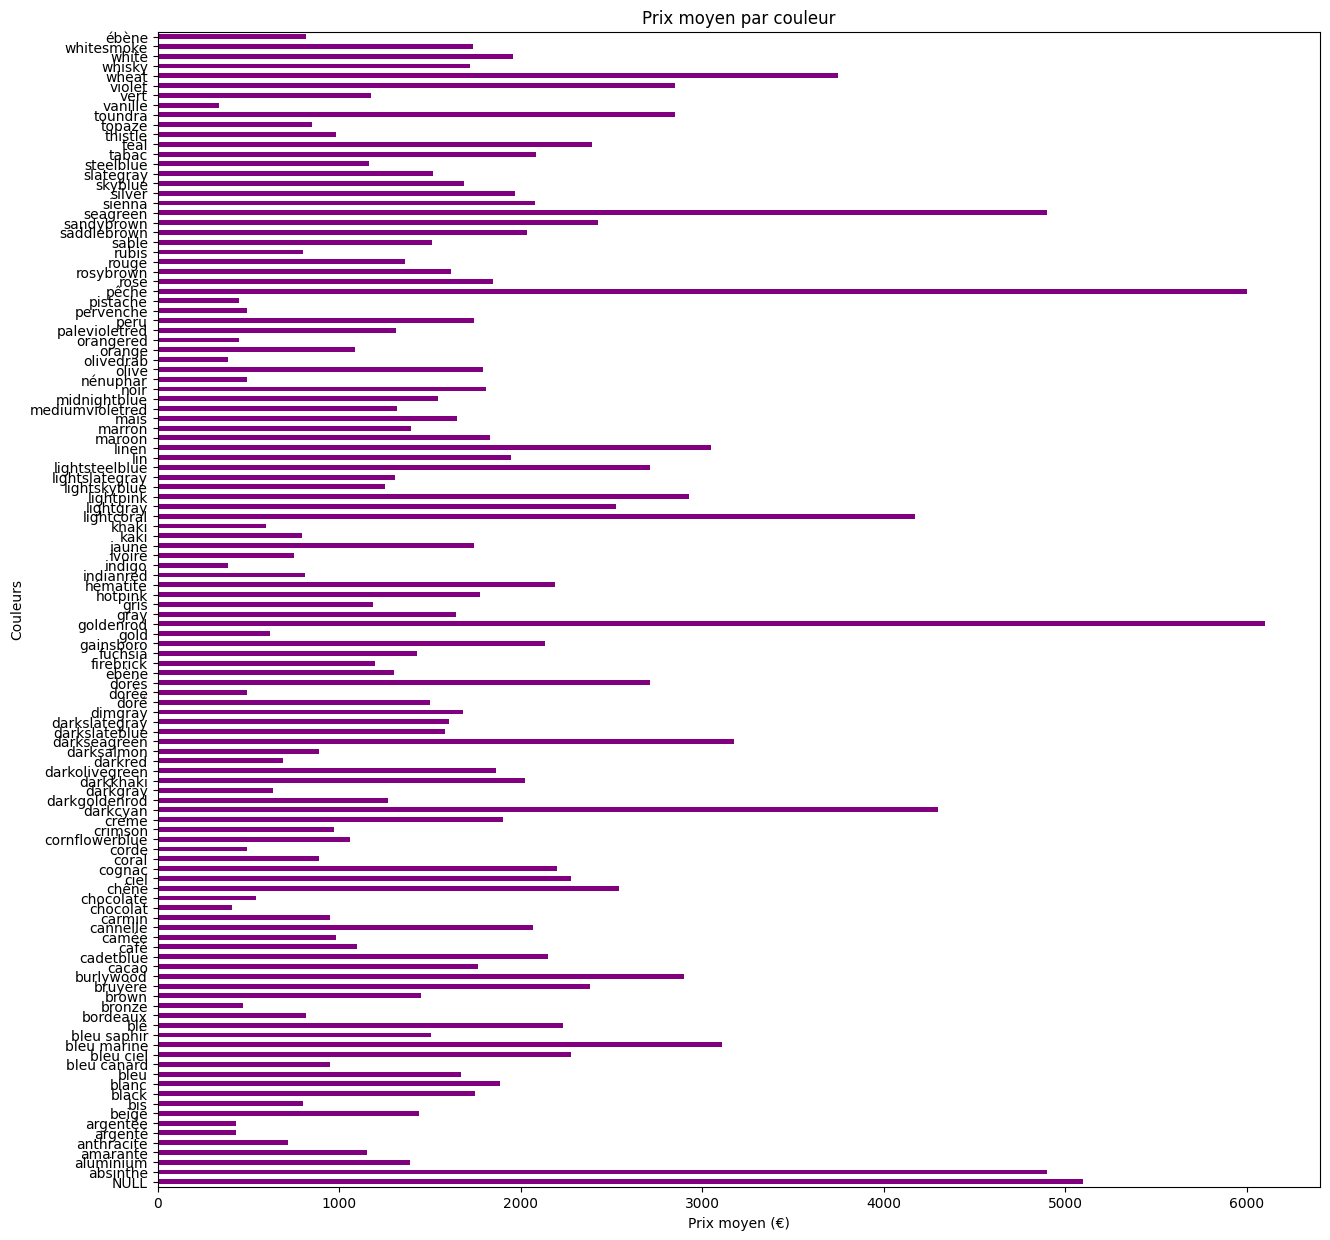

In [ ]:
import ast

df['color_names'] = df['color_names'].apply(ast.literal_eval)

# Exploser la colonne 'color_names' pour avoir une ligne par couleur
df_exploded = df.explode('color_names')

# Grouper par couleur et calculer le prix moyen
prix_moyen_par_couleur = df_exploded.groupby('color_names')['prix_numeric'].mean()

# Afficher le graphique
prix_moyen_par_couleur.plot(kind='barh', figsize=(15, 15), color='purple')
plt.title('Prix moyen par couleur')
plt.xlabel('Prix moyen (€)')
plt.ylabel('Couleurs')
plt.show()



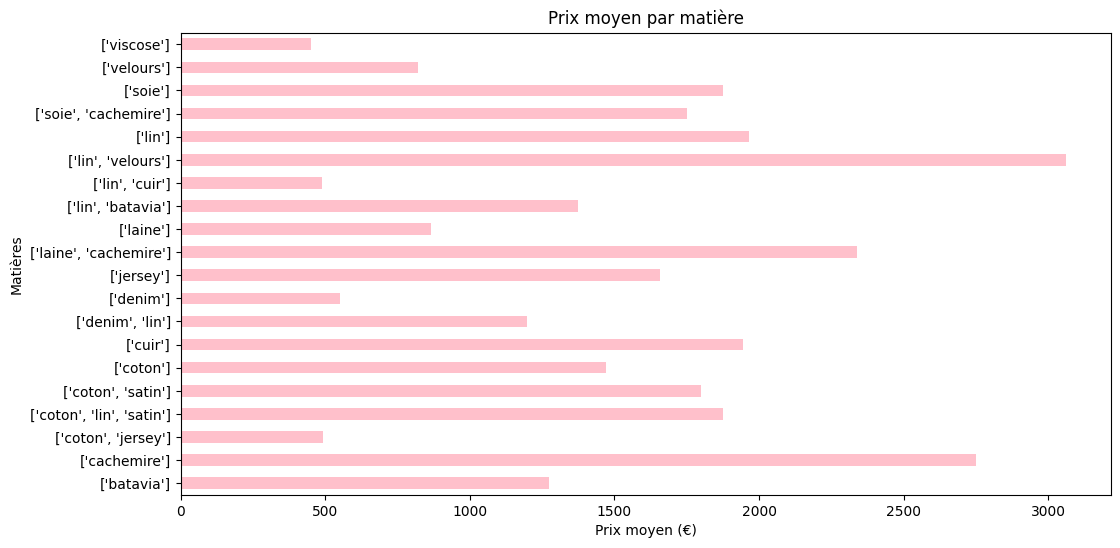

In [ ]:
prix_moyen_par_matière = df.groupby('matières')['prix_numeric'].mean()

prix_moyen_par_matière.plot(kind='barh', figsize=(12, 6), color='pink')
plt.title('Prix moyen par matière')
plt.xlabel('Prix moyen (€)')
plt.ylabel('Matières')
plt.show()

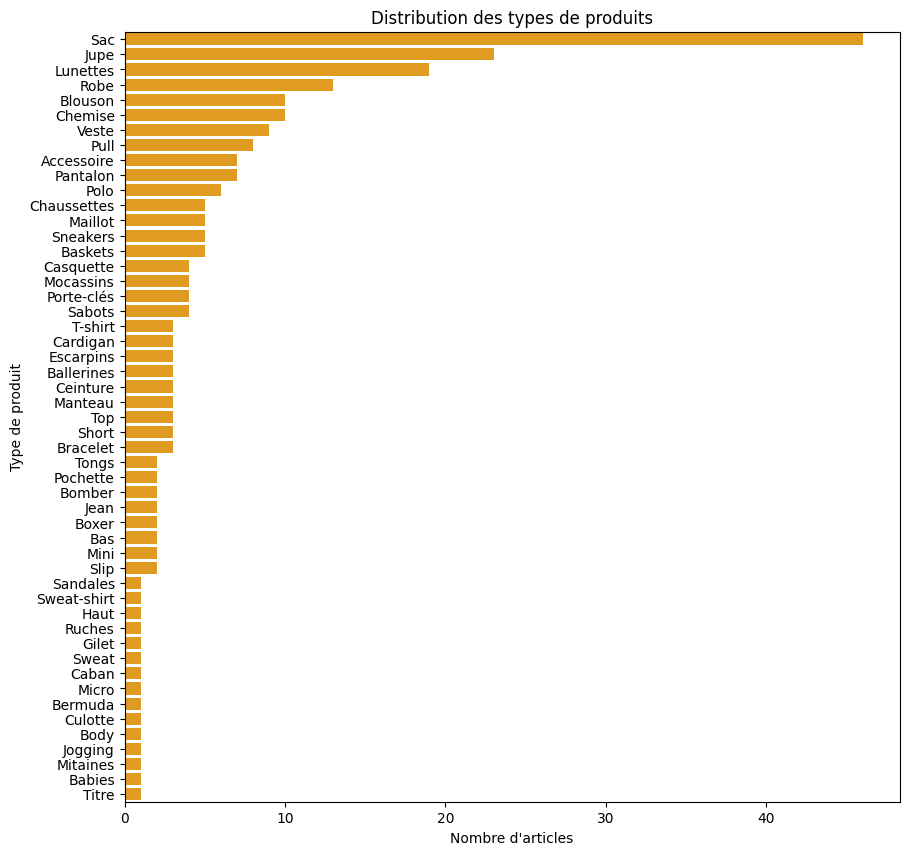

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.countplot(y=df["type"], order=df["type"].value_counts().index,color='orange')
plt.title("Distribution des types de produits")
plt.xlabel("Nombre d'articles")
plt.ylabel("Type de produit")
plt.show()

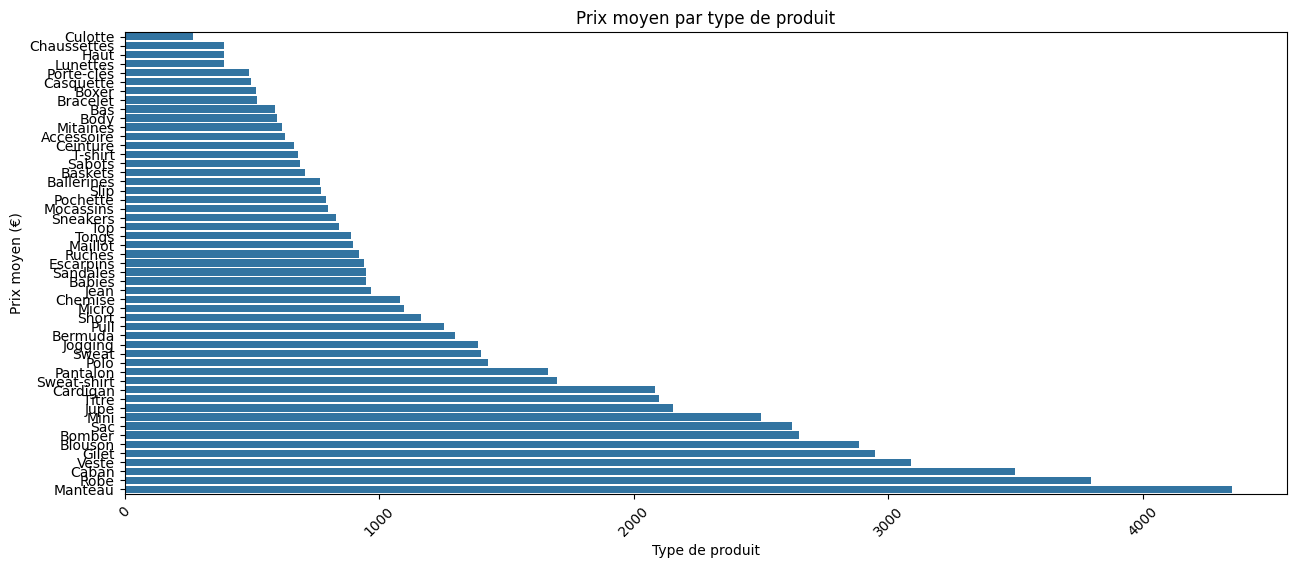

In [ ]:
prix_moyen_par_type = df.groupby("type")["prix_numeric"].mean().sort_values()


plt.figure(figsize=(15, 6))
sns.barplot(x=prix_moyen_par_type.values, y=prix_moyen_par_type.index,orient='h')
plt.xticks(rotation=45)
plt.title("Prix moyen par type de produit")
plt.xlabel("Type de produit")
plt.ylabel("Prix moyen (€)")
plt.show()


In [ ]:


# Exploser la colonne 'color_names' pour avoir une ligne par couleur
df_exploded = df.explode('color_names')

# Créer une table croisée avec prix moyen
pivot_table = df_exploded.pivot_table(values='prix_numeric', index='color_names', columns='matières', aggfunc='mean')

# Afficher la table croisée
print(pivot_table)

matières     ['batavia']  ['cachemire']  ['coton', 'jersey']  \
color_names                                                    
NULL                 NaN            NaN                  NaN   
absinthe             NaN            NaN                  NaN   
aluminium            NaN            NaN                  NaN   
amarante             NaN            NaN                770.0   
anthracite           NaN            NaN                  NaN   
...                  ...            ...                  ...   
wheat                NaN            NaN                  NaN   
whisky               NaN            NaN                  NaN   
white                NaN            NaN                  NaN   
whitesmoke           NaN            NaN                  NaN   
ébène                NaN            NaN                  NaN   

matières     ['coton', 'lin', 'satin']  ['coton', 'satin']  ['coton']  \
color_names                                                             
NULL                 

In [ ]:
pip install seaborn

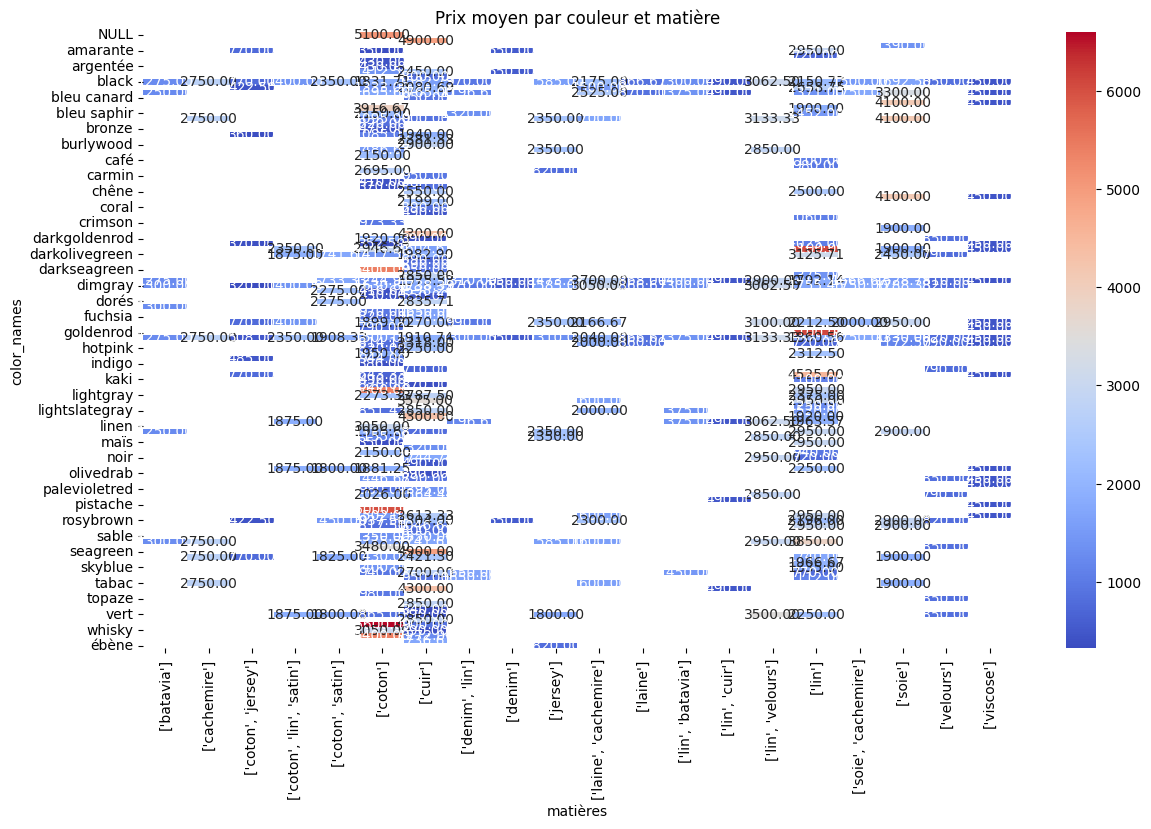

In [ ]:
import seaborn as sns

# Heatmap des prix par couleur et matière
plt.figure(figsize=(14, 8))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Prix moyen par couleur et matière')
plt.show()


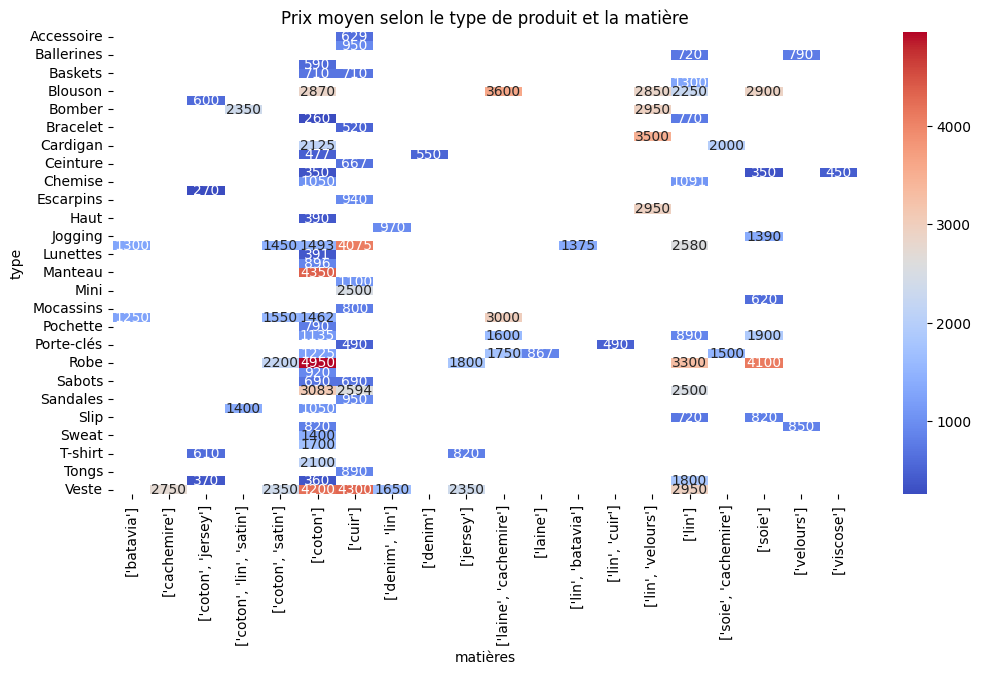

In [ ]:
pivot_table = df.pivot_table(values="prix_numeric", index="type", columns="matières", aggfunc="mean")
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", fmt=".0f")
plt.title("Prix moyen selon le type de produit et la matière")
plt.show()


# EMBEDDINGS

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download fr_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 38.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
!python -m spacy download fr_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 43.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('fr_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import re
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
nlp = spacy.load("fr_core_news_sm")

In [ ]:
mots_inutiles = [
    "style", "modèle", "modèles", "look", "collection",
    "pièce", "pièces", "design", "élégant", "élégante",
    "tendance", "mode", "référence", "version", "saison",
    "indispensable", "iconique", "classique", "basique",
    "intemporel", "confort", "confortable", "unique",
    "original", "nouveau", "nouvelle", "beau", "belle",
    "parfait", "parfaite", "élégance", "moderne", "chic",
    "décontracté", "détail", "détails", "finition",
    "qualité", "premium", "raffiné", "must", "incontournable",
    "inspiré", "inspiration", "touché", "allure", "effet",
    "matière", "matières", "sublimer", "souligner", "apporter",
    "disponible", "adopter", "afficher", "présenter",
    "venir", "retrouver", "travaillé", "proposé", "proposée",
    "pensé", "pensée", "doux", "douce", "léger", "légère",
    "adapté", "adaptée", "associé", "associée", "facilement",
    "facile", "idéale", "idéale", "mélange", "structure",
    "ajout", "parfaitement", "charme", "touches", "ligne",
    "cette", "ce", "cet", "ces", "ainsi", "dont", "très",
    "plus", "aussi", "bien", "avec", "sans", "pour","cette","lettre","touche"
    ,"vêtement", "couleur", "forme","accessoire","technique"
]

In [ ]:
def preprocess(texte):
    texte = re.sub(r"[^a-zA-ZÀ-ÿ]", " ", texte.lower())
    doc = nlp(texte)

    tokens = [
        token.lemma_
        for token in doc
        if not token.is_stop
        and token.pos_ in {"NOUN", "ADJ"}
        and token.lemma_ not in mots_inutiles
    ]
    return " ".join(tokens)

df["description_preprocessed"] = df["description"].apply(preprocess)


In [ ]:
# Télécharger les stopwords en français
nltk.download('stopwords')
stop_words = stopwords.words('french')
vectorizer = TfidfVectorizer(stop_words=stop_words,max_features=100, max_df=0.7)
X_tfidf = vectorizer.fit_transform(df["description_preprocessed"])
scaler = StandardScaler(with_mean=False)
X_scaled = scaler.fit_transform(X_tfidf)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


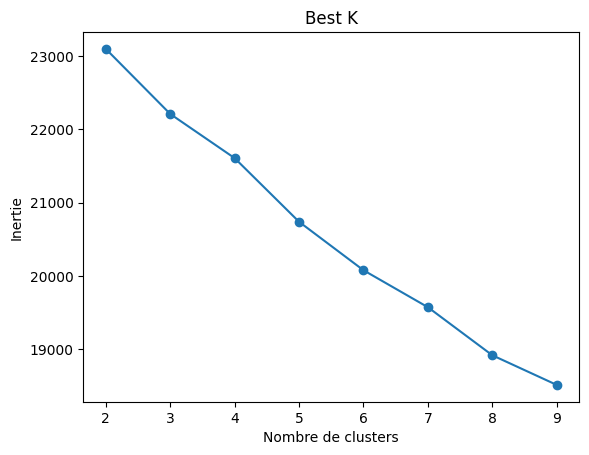

In [ ]:
inertie = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertie.append(km.inertia_)


# Tracer le coude
import matplotlib.pyplot as plt
plt.plot(range(2, 10), inertie, marker="o")
plt.xlabel("Nombre de clusters")
plt.ylabel("Inertie")
plt.title("Best K")
plt.show()


In [ ]:
km = KMeans(n_clusters=6, random_state=42, n_init=10)
df["cluster"] = km.fit_predict(X_tfidf)


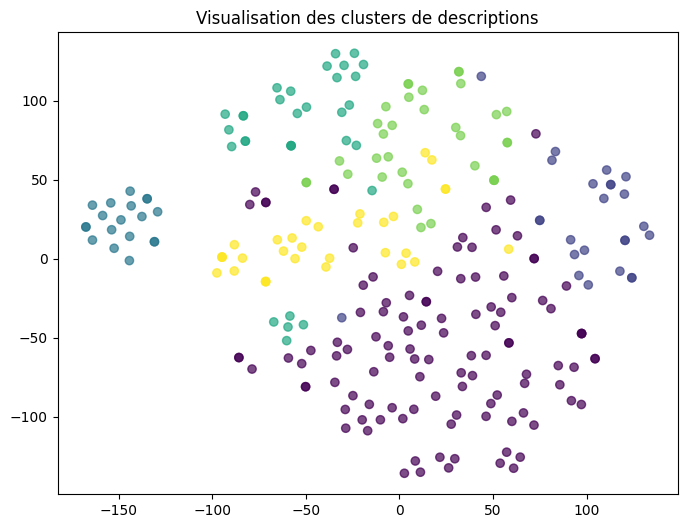

In [ ]:
from sklearn.manifold import TSNE

X_embedded = TSNE(n_components=2, random_state=42).fit_transform(X_tfidf.toarray())

plt.figure(figsize=(8, 6))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], c=df["cluster"], cmap="viridis", alpha=0.7)
plt.title("Visualisation des clusters de descriptions")
plt.show()


In [ ]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords


feature_names = vectorizer.get_feature_names_out()

# Extraction des top termes par cluster
for i in range(6):  # suppose 4 clusters
    print(f"Cluster {i}")
    cluster_center = km.cluster_centers_[i]
    top_terms_idx = cluster_center.argsort()[-6:][::-1]
    top_terms = [feature_names[idx] for idx in top_terms_idx]
    print(", ".join(top_terms))


Cluster 0
coton, popeline, logo, brodé, tissu, robe
Cluster 1
fil, combinaison, maill, année, expérimentale, bain
Cluster 2
soleil, lunette, branche, monture, verre, ultra
Cluster 3
sac, cuir, aventure, métallique, grand, estamper
Cluster 4
cuir, logo, suède, audacieux, doré, vintage
Cluster 5
sportif, passepoil, sac, anse, contrastant, caractère


In [ ]:
for i in range(6):  # Si tu as 6 clusters
    print(f"\n🟣 Cluster {i} - Produits :\n")
    produits = df[df["cluster"] == i][["titre", "description"]].head(5)  #
    print(produits.to_string(index=False))


🟣 Cluster 0 - Produits :

                                                              titre                                                                                                                                                                                                                      description
                           Polo En Piqué Et Popeline Bleu | Miu Miu                            Le polo classique en piqué est revisité selon les codes de l’uniforme Miu Miu. Les détails en popeline à carreaux sur le col et les manches jouent avec des superpositions audacieuses et iconiques. 
                                 Pantalon En Batavia Bleu | Miu Miu                       L’essence classique du tissu batavia prend un air contemporain sur ce pantalon aux lignes décontractées, agrémenté du cordon de serrage bicolore iconique, élément casual et distinctif du style Miu Miu. 
                Veste À Capuche Zippée En Cachemire Tabac | Miu Miu Parmi d’autres vêtements c

# Travail avec les couleurs

In [ ]:
df.head()

,url,titre,description,prix_numeric,couleurs,matières,type,image,dominant_colors_array,color_names,dominant_colors,flattened_colors,description_preprocessed,cluster
0,https://www.miumiu.com/fr/fr/p/cardigan-en-cac...,Cardigan En Cachemire Et Soie À Maille Torsadé...,Ce cardigan en cachemire et soie affiche un mo...,2000.0,['bleu'],"['soie', 'cachemire']",Cardigan,https://www.miumiu.com/content/dam/miumiubkg_p...,NaN,"['bleu', 'gainsboro', 'darkslategray', 'gray',...",[[231 227 218]\n [ 70 70 81]\n [120 119 124]...,"[231, 227, 218, 70, 70, 81, 120, 119, 124, 95,...",cardigan cachemire soie motif maill relief grâ...,1
1,https://www.miumiu.com/fr/fr/p/polo-en-pique-e...,Polo En Piqué Et Popeline Bleu | Miu Miu,Le polo classique en piqué est revisité selon ...,890.0,"['bleu', 'lin']",['lin'],Polo,https://www.miumiu.com/content/dam/miumiubkg_p...,NaN,"['bleu', 'lin', 'black', 'lightslategray', 'di...",[[ 18 18 27]\n [133 153 179]\n [ 84 84 89]...,"[18, 18, 27, 133, 153, 179, 84, 84, 89, 155, 1...",polo piquer code uniforme popeline carreau col...,0
2,https://www.miumiu.com/fr/fr/p/pantalon-en-bat...,Pantalon En Batavia Bleu | Miu Miu,L’essence classique du tissu batavia prend un ...,1250.0,['bleu'],['batavia'],Pantalon,https://www.miumiu.com/content/dam/miumiubkg_p...,NaN,"['bleu', 'black', 'gray', 'darkslategray', 'ma...",[[ 13 15 24]\n [124 118 116]\n [ 78 73 73]...,"[13, 15, 24, 124, 118, 116, 78, 73, 73, 71, 24...",essence tissu air contemporain pantalon cordon...,0
3,https://www.miumiu.com/fr/fr/p/mocassins-ruche...,Mocassins Ruches En Cuir Nappa Blanc | Miu Miu,Ces élégants mocassins en cuir nappa affichent...,800.0,"['blanc', 'doré']",['cuir'],Mocassins,https://www.miumiu.com/content/dam/miumiubkg_p...,NaN,"['blanc', 'doré', 'gainsboro', 'dimgray', 'dim...",[[231 227 219]\n [100 93 83]\n [124 117 105]...,"[231, 227, 219, 100, 93, 83, 124, 117, 105, 53...",mocassin cuir affichent polyvalent empreinte v...,4
4,https://www.miumiu.com/fr/fr/p/veste-a-capuche...,Veste À Capuche Zippée En Cachemire Tabac | Mi...,Parmi d’autres vêtements classiques au style M...,2750.0,"['tabac', 'blé', 'tabac']",['cachemire'],Veste,https://www.miumiu.com/content/dam/miumiubkg_p...,NaN,"['tabac', 'blé', 'tabac', 'saddlebrown', 'gray...",[[ 92 47 28]\n [141 115 100]\n [ 56 23 8]...,"[92, 47, 28, 141, 115, 100, 56, 23, 8, 126, 90...",emblématique sweat capuche zippé réinterpréter...,0


In [ ]:

import numpy as np

def flatten_colors(colors):
    return colors.reshape(-1, 3)  


df['flat_colors'] = df['flattened_colors'].apply(flatten_colors)

all_colors = np.vstack(df['flat_colors'].values)

k = 12  # Choisir le nombre de clusters
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)


kmeans.fit(all_colors)

def assign_multiple_clusters(dominant_colors, kmeans, threshold=40):
    clusters = []
    for color_rgb in dominant_colors:
        distances = np.linalg.norm(kmeans.cluster_centers_ - color_rgb, axis=1)
        for i, distance in enumerate(distances):
            if distance < threshold:  # Si la couleur est proche du centre du cluster
                clusters.append(i)
    return list(set(clusters))

df["color_clusters"] = df['flat_colors'].apply(lambda colors: assign_multiple_clusters(colors, kmeans))


print(df[["titre", "color_clusters"]])

                                                 titre          color_clusters
0    Cardigan En Cachemire Et Soie À Maille Torsadé...     [1, 2, 4, 5, 9, 11]
1             Polo En Piqué Et Popeline Bleu | Miu Miu         [1, 3, 5, 8, 9]
2                   Pantalon En Batavia Bleu | Miu Miu        [1, 4, 5, 8, 11]
3       Mocassins Ruches En Cuir Nappa Blanc | Miu Miu     [1, 2, 4, 5, 8, 11]
4    Veste À Capuche Zippée En Cachemire Tabac | Mi...        [0, 4, 8, 9, 11]
..                                                 ...                     ...
247            Top En Popeline Flammée Blanc | Miu Miu     [2, 4, 5, 8, 9, 11]
248  Lunettes De Soleil Miu Ombre Verres Marron Cho...     [0, 1, 3, 4, 9, 11]
249  Lunettes De Soleil Miu Ombre Verres Marron Cho...  [0, 1, 3, 4, 5, 9, 11]
250  Lunettes De Soleil Miu Ombre Verres Camomille ...  [0, 1, 3, 4, 5, 9, 11]
251             Slip En Popeline Bleu Saphir | Miu Miu               [9, 3, 6]

[252 rows x 2 columns]


In [ ]:
print("Cluster centers (RGB):")
print(kmeans.cluster_centers_)

Cluster centers (RGB):
[[129.125       93.1375      54.7875    ]
 [  2.64761905   1.8952381    2.1       ]
 [227.20481928 220.98795181 214.79518072]
 [186.0625     135.4375     112.675     ]
 [ 79.84920635  55.18253968  45.58730159]
 [ 84.18253968  81.03174603  80.85714286]
 [ 76.46428571 123.07142857 159.28571429]
 [175.84615385  39.80769231  56.46153846]
 [ 41.03355705  33.23489933  33.48322148]
 [147.29931973 142.63265306 138.6462585 ]
 [219.66666667 170.66666667  63.        ]
 [127.         112.33701657 102.46961326]]


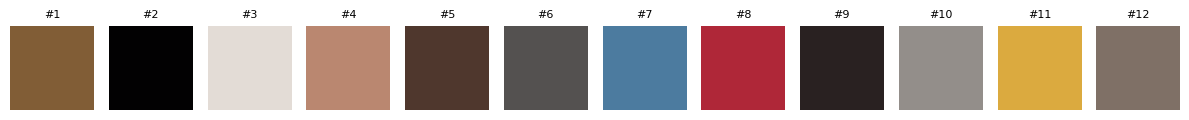

In [ ]:
cluster=np.array([
[129.125       ,93.1375,      54.7875    ],
 [  2.64761905   ,1.8952381,    2.1       ],
 [227.20481928 ,220.98795181, 214.79518072],
 [186.0625     ,135.4375 ,    112.675     ],
 [ 79.84920635 , 55.18253968,  45.58730159],
 [ 84.18253968 , 81.03174603,  80.85714286],
 [ 76.46428571 ,123.07142857, 159.28571429],
 [175.84615385  ,39.80769231,  56.46153846],
 [ 41.03355705  ,33.23489933,  33.48322148],
 [147.29931973 ,142.63265306 ,138.6462585 ],
 [219.66666667 ,170.66666667,  63.        ],
 [127.         ,112.33701657, 102.46961326]
]) / 255.0

# Affichage
plt.figure(figsize=(12, 2))
for i, color in enumerate(cluster):
    plt.subplot(1, len(cluster), i + 1)
    plt.imshow([[color]])
    plt.axis('off')
    plt.title(f'#{i+1}', fontsize=8)
plt.tight_layout()
plt.show()

In [92]:
import pandas as pd

# Lire les différents fichiers
unigrams = pd.read_csv("/content/drive/MyDrive/unigrams.csv")
bigrams = pd.read_csv("/content/drive/MyDrive/bigrams.csv")
trigrams = pd.read_csv("/content/drive/MyDrive/trigrams.csv")
quadrigrams = pd.read_csv("/content/drive/MyDrive/quadrigrams.csv")
pentagrams = pd.read_csv("/content/drive/MyDrive/pentagrams.csv")

# Ajouter une colonne indiquant le type de n-gram
unigrams['level'] = 'unigram'
bigrams['level'] = 'bigram'
trigrams['level'] = 'trigram'
quadrigrams['level'] = 'quadrigram'
pentagrams['level'] = 'pentagram'

# Fusionner tout
ngrams_all = pd.concat([unigrams, bigrams, trigrams, quadrigrams, pentagrams], ignore_index=True)

In [91]:
# Nettoyage texte
ngrams_all['ngram'] = ngrams_all['ngram'].str.lower().str.strip()

In [78]:
# Exemple : filtrer les ngrams trop rares
ngrams_filtered = ngrams_all[ngrams_all['frequency'] >= 20]

# Charger produits
df_produits = pd.read_csv("/content/drive/MyDrive/produits_final.csv")


# Créer un champ texte global à scanner
df_produits['full_text'] = (
    df_produits['titre'].fillna('') + ' ' +
    df_produits['description'].fillna('') + ' ' +
    df_produits['matières'].astype(str) + ' ' +
    df_produits['type'].astype(str) + ' ' +
    df_produits['color_names'].astype(str)
).str.lower()

# Créer des variables booléennes pour les N-grams
for ngram in ngrams_filtered['ngram']:
    col_name = ngram.replace(' ', '_').replace('-', '_')
    df_produits[col_name] = df_produits['full_text'].apply(lambda x: 1 if ngram in x else 0)

# Score tendance pondéré
df_produits['trend_score'] = 0
for _, row in ngrams_filtered.iterrows():
    col = row['ngram'].replace(' ', '_').replace('-', '_')
    if col in df_produits.columns:
        df_produits['trend_score'] += df_produits[col] * row['frequency']


<ipython-input-78-9df30d41b525>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_produits[col_name] = df_produits['full_text'].apply(lambda x: 1 if ngram in x else 0)
<ipython-input-78-9df30d41b525>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_produits[col_name] = df_produits['full_text'].apply(lambda x: 1 if ngram in x else 0)
<ipython-input-78-9df30d41b525>:20: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider 

In [48]:
print("y_test (réel) :")
print(y_test.values)

print("\ny_pred (prédit) :")
print(y_pred)

y_test (réel) :
[0 0 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 0 0 0 1 0 1 1 1]

y_pred (prédit) :
[0 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0
 1 1 1 0 1 1 0 0 0 1 0 1 1 1]


In [68]:
import pandas as pd

df_test = pd.DataFrame([produit_test])

In [88]:
import nltk
from nltk.corpus import stopwords

# Télécharger les stopwords (à faire une fois)
nltk.download('stopwords')

# Charger la liste des stopwords anglais
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [93]:
import pandas as pd

# Lire les différents fichiers
unigrams = pd.read_csv("/content/drive/MyDrive/unigrams.csv")
bigrams = pd.read_csv("/content/drive/MyDrive/bigrams.csv")
trigrams = pd.read_csv("/content/drive/MyDrive/trigrams.csv")
quadrigrams = pd.read_csv("/content/drive/MyDrive/quadrigrams.csv")
pentagrams = pd.read_csv("/content/drive/MyDrive/pentagrams.csv")

# Ajouter une colonne indiquant le type de n-gram
unigrams['level'] = 'unigram'
bigrams['level'] = 'bigram'
trigrams['level'] = 'trigram'
quadrigrams['level'] = 'quadrigram'
pentagrams['level'] = 'pentagram'

# Fusionner tout
ngrams_all = pd.concat([unigrams, bigrams, trigrams, quadrigrams, pentagrams], ignore_index=True)

In [94]:

ngrams_filtered = ngrams_all[ngrams_all['frequency'] >= 20].reset_index(drop=True)

In [109]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Charger modèle multilingue
model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Embeddings des ngrams (en anglais)
ngrams_list = ngrams_filtered['ngram'].tolist()
ngrams_embeddings = model.encode(ngrams_list, convert_to_tensor=False)

# Embeddings des produits (texte français)
produits_textes = (df_produits['titre'].fillna('') + ' ' + df_produits['description'].fillna('')).tolist()
produits_embeddings = model.encode(produits_textes, convert_to_tensor=False)




In [110]:
# Calculer une matrice de similarité cosinus entre chaque produit et chaque ngram
from sklearn.metrics.pairwise import cosine_similarity

sim_matrix = cosine_similarity(produits_embeddings, ngrams_embeddings)  # shape = (nb_produits, nb_ngrams)

# Pondérer par la fréquence des ngrams
freqs = ngrams_filtered['frequency'].values  # shape = (nb_ngrams,)
weighted_sim = sim_matrix * freqs  # broadcasting freq sur chaque produit

# Calculer un score tendance par produit en sommant les similarités pondérées
df_produits['trend_score'] = weighted_sim.sum(axis=1)

# Créer la cible binaire
df_produits['is_trendy'] = (df_produits['trend_score'] > df_produits['trend_score'].median()).astype(int)

In [111]:
print(df_produits["is_trendy"].head())

0    1
1    0
2    1
3    1
4    0
Name: is_trendy, dtype: int64


In [120]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# --- 1. Chargement des données ---


# --- 2. Générer embeddings globaux des produits (titre + description) ---

model_bert = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

textes = (
    df_produits['titre'].fillna('') + ' ' +
    df_produits['description'].fillna('') + ' ' +
    df_produits['type'].fillna('') + ' ' +
    df_produits['matières'].fillna('') + ' ' +
    df_produits['color_names'].fillna('')
).tolist()

embeddings_global = model_bert.encode(textes, show_progress_bar=True)

# --- 3. Générer embeddings des n-grams ---

ngrams_list = ngrams_filtered['ngram'].tolist()
embeddings_ngrams = model_bert.encode(ngrams_list, show_progress_bar=True)

# --- 4. Calculer la matrice de similarité (produits × ngrams) ---

similarity_matrix = cosine_similarity(embeddings_global, embeddings_ngrams)
# similarity_matrix[i,j] = similarité produit i avec ngram j

# --- 5. Préparer les features finales ---

# Tu peux aussi ajouter d'autres features numériques ou catégorielles ici
# Par exemple, prix, couleur, etc. - ici on ne garde que embeddings + similarités

X_final = np.hstack([embeddings_global, similarity_matrix])

# --- 6. Préparer la cible ---

# Supposons que la cible s'appelle 'is_trendy' dans df_produits (booléen ou 0/1)
y = df_produits['is_trendy']

# --- 7. Split train/test ---

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# --- 8. Entraînement XGBoost ---

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# --- 9. Évaluation ---

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# --- 10. Pour tester sur un produit "random" ---

def predict_single_product(titre, description):
    text = titre + " " + description
    emb_global = model_bert.encode([text])
    # Calcul similarité avec tous les ngrams
    sim = cosine_similarity(emb_global, embeddings_ngrams)
    X_input = np.hstack([emb_global, sim])
    pred = model.predict(X_input)
    return bool(pred[0])

# # Exemple:
# exemple_titre = "Robe d'été légère"
# exemple_desc = "Parfaite pour les journées chaudes, motif floral et coupe fluide."

# print("Prédiction tendance pour exemple produit :", predict_single_product(exemple_titre, exemple_desc))


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:32:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.77      0.81      0.79        21
           1       0.86      0.83      0.85        30

    accuracy                           0.82        51
   macro avg       0.82      0.82      0.82        51
weighted avg       0.83      0.82      0.82        51

Prédiction tendance pour exemple produit : False


In [121]:
def predict_single_product(titre, description, type_, matieres, couleurs):
    # Concaténer toutes les infos textuelles en une seule chaîne
    text = f"{titre} {description} {type_} {' '.join(matieres)} {' '.join(couleurs)}"

    # Générer l'embedding global du produit
    emb_global = model_bert.encode([text])

    # Calculer la similarité avec les embeddings des n-grams
    sim = cosine_similarity(emb_global, embeddings_ngrams)

    # Concaténer embedding global + similarité pour les features finales
    X_input = np.hstack([emb_global, sim])

    # Prédire avec le modèle XGBoost
    pred = model.predict(X_input)

    return bool(pred[0])

# Exemple concret avec infos complètes
exemple_titre = "Robe d'été légère"
exemple_desc = "Parfaite pour les journées chaudes, motif floral et coupe fluide."
exemple_type = "vêtement"
exemple_matieres = ["coton", "lin"]
exemple_couleurs = ["bleu", "blanc"]

result = predict_single_product(exemple_titre, exemple_desc, exemple_type, exemple_matieres, exemple_couleurs)
print("Prédiction tendance pour exemple produit :", result)


Prédiction tendance pour exemple produit : False


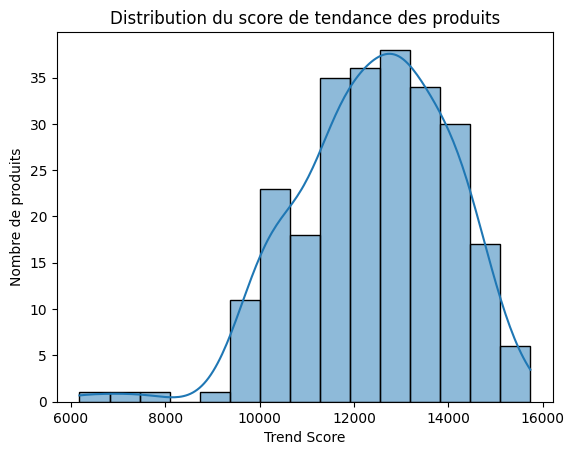

In [122]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df_produits['trend_score'], kde=True)
plt.title("Distribution du score de tendance des produits")
plt.xlabel("Trend Score")
plt.ylabel("Nombre de produits")
plt.show()


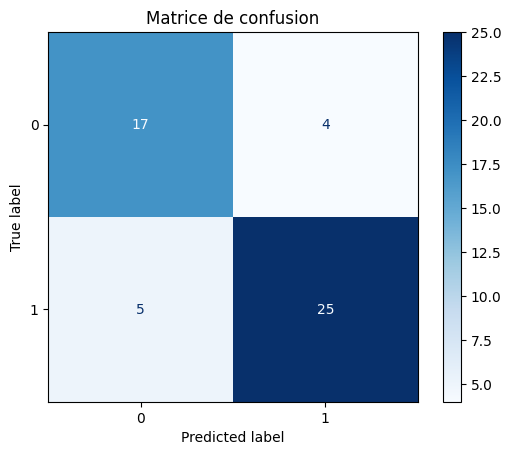

In [123]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap='Blues')
plt.title("Matrice de confusion")
plt.show()


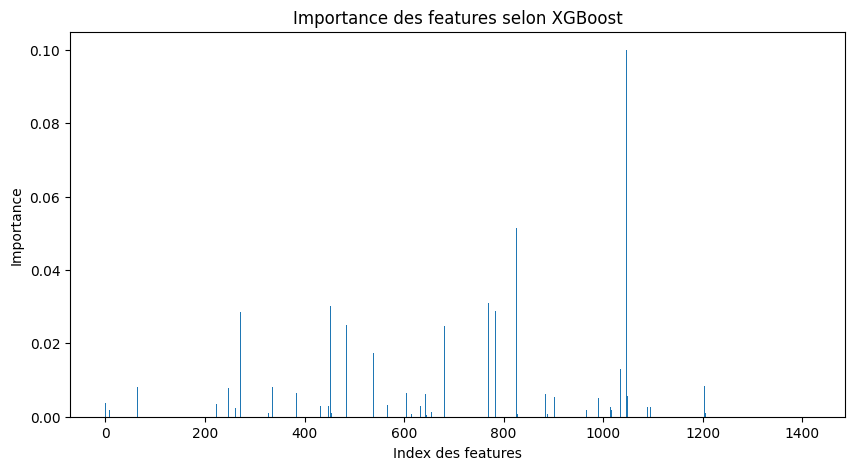

In [124]:
importances = model.feature_importances_
plt.figure(figsize=(10,5))
plt.bar(range(len(importances)), importances)
plt.title("Importance des features selon XGBoost")
plt.xlabel("Index des features")
plt.ylabel("Importance")
plt.show()

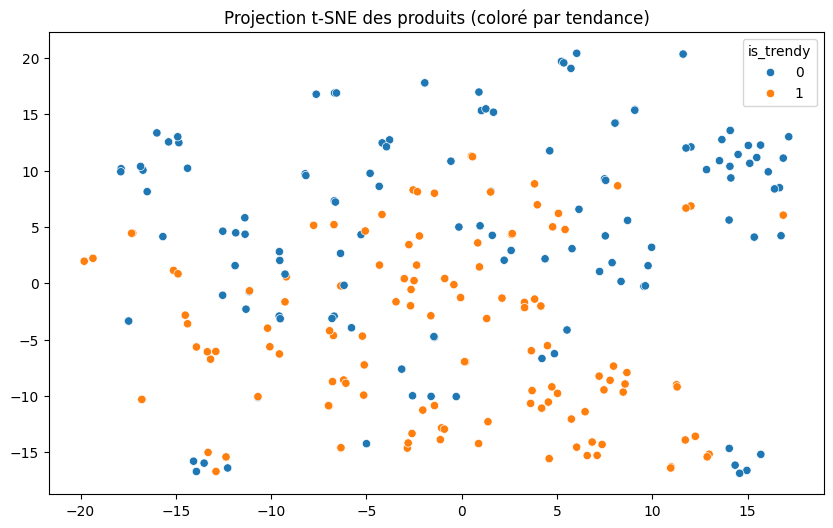

In [125]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_embedded = tsne.fit_transform(X_final)

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_embedded[:,0], y=X_embedded[:,1], hue=df_produits['is_trendy'])
plt.title("Projection t-SNE des produits (coloré par tendance)")
plt.show()


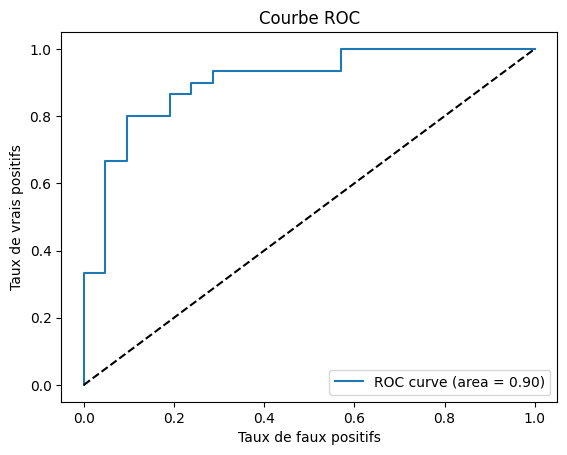

In [126]:
from sklearn.metrics import roc_curve, auc

y_proba = model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC")
plt.legend(loc="lower right")
plt.show()


In [129]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MultiLabelBinarizer, OneHotEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from scipy.sparse import hstack, csr_matrix


# --- 2. Initialiser modèle embeddings ---

model_bert = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# --- 3. Embeddings globaux sur titre + description ---

textes = (
    df_produits['titre'].fillna('') + ' ' +
    df_produits['description'].fillna('') + ' ' +
    df_produits['type'].fillna('') + ' ' +
    df_produits['matières'].fillna('') + ' ' +
    df_produits['color_names'].fillna('')
).tolist()
embeddings_global = model_bert.encode(textes, show_progress_bar=True)

# --- 4. Embeddings des ngrams ---

ngrams_list = ngrams_filtered['ngram'].tolist()
embeddings_ngrams = model_bert.encode(ngrams_list, show_progress_bar=True)

# --- 5. Similarité produit × ngrams ---

similarity_matrix = cosine_similarity(embeddings_global, embeddings_ngrams)

# --- 6. Features numériques (prix) ---

X_num = df_produits[['prix_numeric']].fillna(0).values
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# --- 7. Encodage catégories ---

# Matières (liste de mots)
mlb_matieres = MultiLabelBinarizer()
X_matieres = mlb_matieres.fit_transform(df_produits['matières'])

# Couleurs (liste de mots)
mlb_couleurs = MultiLabelBinarizer()
X_couleurs = mlb_couleurs.fit_transform(df_produits['color_names'])




Batches:   0%|          | 0/8 [00:00<?, ?it/s]

Batches:   0%|          | 0/33 [00:00<?, ?it/s]

In [133]:
# Type (catégorie simple)
ohe_type = OneHotEncoder(sparse_output=True, handle_unknown='ignore')

X_type = ohe_type.fit_transform(df_produits[['type']].fillna(''))

# --- 8. Combiner toutes les features ---

embeddings_global_sparse = csr_matrix(embeddings_global)
similarity_sparse = csr_matrix(similarity_matrix)
X_num_sparse = csr_matrix(X_num_scaled)
X_matieres_sparse = csr_matrix(X_matieres)
X_couleurs_sparse = csr_matrix(X_couleurs)

X_final = hstack([
    embeddings_global_sparse,
    similarity_sparse,
    X_num_sparse,
    X_matieres_sparse,
    X_couleurs_sparse,
    X_type
])

# --- 9. Cible ---

y = df_produits['is_trendy'].astype(int).values

# --- 10. Split train/test ---

X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# --- 11. Entraînement XGBoost ---

model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# --- 12. Évaluation ---

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:46:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

           0       0.80      0.95      0.87        21
           1       0.96      0.83      0.89        30

    accuracy                           0.88        51
   macro avg       0.88      0.89      0.88        51
weighted avg       0.90      0.88      0.88        51



In [136]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def recommend_similar_products(product_index, df_produits, embeddings_global, top_k=5):
    """
    Recommande les top_k produits similaires au produit donné (index),
    filtrés pour ne garder que ceux considérés comme tendance.
    Affiche aussi le produit de base.
    """
    # Afficher le produit de base
    print("Produit de base :")
    print(f"Index {product_index}")
    print(f"Titre : {df_produits.loc[product_index, 'titre']}")
    print(f"Description : {df_produits.loc[product_index, 'description'][:100]}...\n")

    # Calculer la similarité cosine du produit avec tous les autres
    similarities = cosine_similarity(embeddings_global[product_index].reshape(1, -1), embeddings_global).flatten()

    # Exclure le produit lui-même
    similarities[product_index] = -1

    # Filtrer uniquement les produits tendance
    trendy_indices = df_produits.index[df_produits['is_trendy'] == 1].tolist()

    # Garder les similarités des produits tendance
    similarities_trendy = [(idx, similarities[idx]) for idx in trendy_indices]

    # Trier par similarité décroissante
    similarities_trendy = sorted(similarities_trendy, key=lambda x: x[1], reverse=True)

    # Prendre les top_k
    top_recommendations = similarities_trendy[:top_k]

    # Afficher les résultats
    print(f"Top {top_k} recommandations similaires (produits tendance) :")
    for idx, score in top_recommendations:
        print(f"Produit index {idx} - Similarité : {score:.3f}")
        print(f"  Titre : {df_produits.loc[idx, 'titre']}")
        print(f"  Description : {df_produits.loc[idx, 'description'][:100]}...\n")

# Exemple d'utilisation : recommander à partir du produit d'index 0
recommend_similar_products(0, df_produits, embeddings_global, top_k=5)




Produit de base :
Index 0
Titre : Cardigan En Cachemire Et Soie À Maille Torsadée Bleu | Miu Miu
Description : Ce cardigan en cachemire et soie affiche un motif en maille torsadée, créant un effet de relief grâc...

Top 5 recommandations similaires (produits tendance) :
Produit index 86 - Similarité : 0.707
  Titre : Short En Tissu Technique Marron Cacao | Miu Miu
  Description : La douceur du tissu technique côtoie la touche colorée du cordon de serrage. Le logo imprimé apporte...

Produit index 205 - Similarité : 0.688
  Titre : Bracelet En Cuir Avec Boucle Bruyère  | Miu Miu
  Description : La boucle en métal, qui rappelle le détail de la ceinture, confère à ce bracelet un esprit vintage s...

Produit index 71 - Similarité : 0.680
  Titre : Chemise En Popeline À Carreaux Céleste+bleu | Miu Miu
  Description : Cette chemise en popeline à carreaux affiche une coupe carrée et un ourlet à bord brut, des éléments...

Produit index 53 - Similarité : 0.665
  Titre : Jupe Courte À Carreaux 

In [137]:
from collections import defaultdict
import numpy as np

# 1. Parser les clusters depuis un fichier texte
clusters = defaultdict(list)

with open('bigrams_clusters_15.txt', 'r', encoding='utf-8') as f:
    current_cluster = None
    for line in f:
        line = line.strip()
        if line.startswith("Cluster"):
            # ligne "Cluster 0:"
            current_cluster = int(line.split()[1].replace(":", ""))
        elif line:
            # ligne avec les bigrammes séparés par des virgules
            bigrams = [b.strip() for b in line.split(',')]
            clusters[current_cluster].extend(bigrams)

In [138]:
from sentence_transformers import SentenceTransformer

model_bert = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')

# Tous les bigrammes uniques dans tous les clusters
all_bigrams = list(set(b for bigrams in clusters.values() for b in bigrams))

# Embeddings bigrammes
embeddings_bigrams = model_bert.encode(all_bigrams, show_progress_bar=True)


Batches:   0%|          | 0/157 [00:00<?, ?it/s]

In [150]:
bigram_to_embedding = dict(zip(all_bigrams, embeddings_bigrams))


In [151]:
import numpy as np

cluster_centroids = {}
for cluster_id, bigrams in clusters.items():
    emb_list = [bigram_to_embedding[b] for b in bigrams if b in bigram_to_embedding]
    if emb_list:
        centroid = np.mean(emb_list, axis=0)
    else:
        centroid = np.zeros(embeddings_bigrams.shape[1])  # vecteur nul si vide
    cluster_centroids[cluster_id] = centroid


In [141]:
import pandas as pd

# Ex: df_produits avec colonnes 'titre' et 'description'
texts = (
    df_produits['titre'].fillna('') + ' ' +
    df_produits['description'].fillna('') + ' ' +
    df_produits['type'].fillna('') + ' ' +
    df_produits['matières'].fillna('') + ' ' +
    df_produits['color_names'].fillna('')
).tolist()
embeddings_products = model_bert.encode(texts, show_progress_bar=True)


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

In [152]:
from sklearn.metrics.pairwise import cosine_similarity

centroid_matrix = np.array([cluster_centroids[c] for c in sorted(cluster_centroids.keys())])

# Similarité produit × centroïdes clusters
similarities = cosine_similarity(embeddings_products, centroid_matrix)

# Cluster assigné à chaque produit (celui avec la plus grande similarité)
assigned_clusters = np.argmax(similarities, axis=1)

# Par exemple, afficher le cluster du premier produit
print(f"Produit 0 assigné au cluster {assigned_clusters[0]} avec score {similarities[0, assigned_clusters[0]]:.3f}")
print(f"Produit 1 assigné au cluster {assigned_clusters[1]} avec score {similarities[0, assigned_clusters[1]]:.3f}")
print(f"Produit 2 assigné au cluster {assigned_clusters[2]} avec score {similarities[0, assigned_clusters[2]]:.3f}")


Produit 0 assigné au cluster 2 avec score 0.543
Produit 1 assigné au cluster 5 avec score 0.465
Produit 2 assigné au cluster 4 avec score 0.385
